# Self Interaction challenge

The purpose of this challenge is for you to build a solver for a self interacting particle:

$$
    H \phi(x) = \lambda \phi(x),
$$

with

$$
    H = -\frac{\partial^2}{\partial x^2} +  \kappa x^2 + q \rho(x),
$$

where the density is defined as: 

$$
   \rho(x) = |\phi(x)|^2,
$$

and the wave-function is normalized:

$$
    \int |\phi(x)|^2dx = 1
$$

With parameters $\alpha =\{\kappa, q\}$. This is the 1D Gross-Pitaevskii equation describing approximately the low-energy properties of dilute Bose-Einstein condensates. We will use it as a proxy for the non-linear Density Functional Theory equations. Check out https://journals.aps.org/prc/abstract/10.1103/PhysRevC.106.054322 for a cool emulator on it.

Note that $H$ depends on $\phi$, this is a tricky problem to solve. One approach is to solve it first for $q=0$ (no self-interaction), obtain the wave function $\phi$, create the density $\rho(x)$, plug it back into $H$ and solve it again, repeating until the system converges. One recomendation is to mix the new solutions slowly to avoid instabilities: when updating the new density $\rho(x)$ to mix it with the previous one, around $85\%$ and $15\%$ old with new.

Your tasks are:

- Build a numerical solver for the GP equation. For that, you can use the finite element method, but since now your Hamiltonian depends on $\phi$ you will have to solve the problem iteratively. Ask for help and hints if this is your first time solving a self consistent problem.

- Plot the solutions for different values of $\kappa$ and $q$ and calculate the respective eigenvalues, similar to Figure 3 of https://journals.aps.org/prc/abstract/10.1103/PhysRevC.106.054322.


Bellow is a solver for the Harmonic Oscillator that you can use as a starting point

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import time


In [2]:
def generate_second_derivative_matrix(xgrid):
    N = len(xgrid)
    dx = xgrid[1]-xgrid[0]
    
    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 /2 / dx**2)
    off_diag = np.ones(N - 1)* 4/3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))
    
    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)
    

    
    return D2

In [3]:
def generate_potential_matrix(xgrid):
    return np.diag(xgrid**2)

In [9]:
def HO_solver(kappa,D2Mat,vpot):
    
    H = -D2Mat + kappa*vpot
    evals,evects = np.linalg.eigh(H)
    
    return [evals[0],evects.T[0]]

In [10]:
#Example of a fixed grid

x_max = 10.0  # Maximum coordinate value for the grid

N_grid=150
# Set up the coordinate grid
x = np.linspace(-x_max, x_max, N_grid)

D20=generate_second_derivative_matrix(x)
V0=generate_potential_matrix(x)

In [11]:
kappa0=2

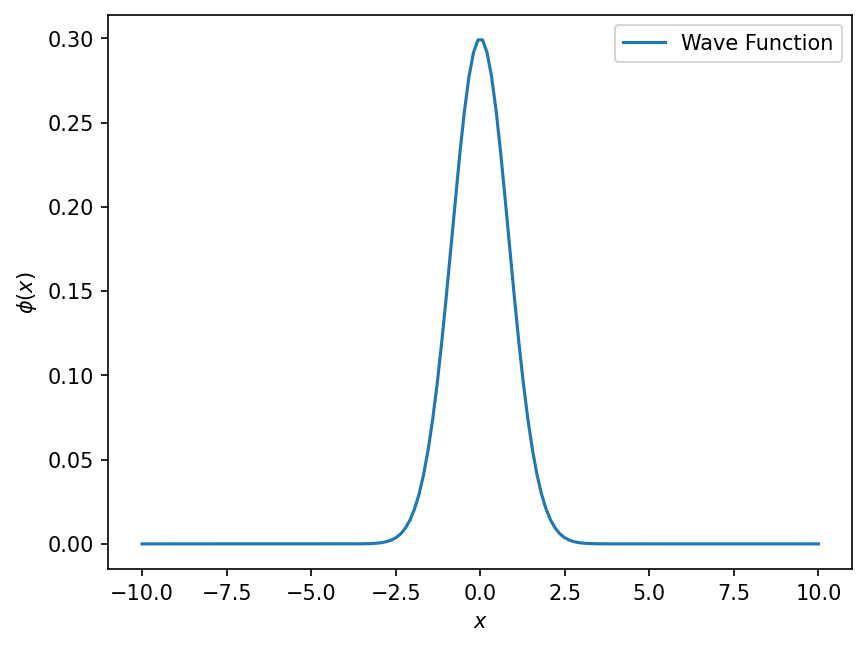

In [12]:
fig = plt.figure(dpi=150)

plt.plot(x,HO_solver(kappa0,D20,V0)[1],label='Wave Function')

plt.legend()
plt.ylabel(r'$\phi(x)$')
plt.xlabel(r'$x$');

plt.show()

